# Getting used to the jupyter notebook

In [60]:
print(1)

1


In [61]:
a = [1, 2]
len(a)

2

In [62]:
sum(a)

3

# Data loading with Pandas

In [1]:
import pandas as pd

In [2]:
# subset of the 1993 US census
data = pd.read_csv ('/Users/sangeetha/Documents/sangeetha/OneDrive-2020-05-11/Week-1/adult.csv', index_col=0)
#data = pd.read_csv("adult.csv", index_col=0)
#If you set index_col to 0, then the first column of the dataframe will become the row label. 

In [3]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Simple analysis

In [4]:
data.shape

(32561, 14)

In [5]:
data.columns

Index([u'age', u'workclass', u'education', u'education-num', u'marital-status',
       u'occupation', u'relationship', u'race', u'gender', u'capital-gain',
       u'capital-loss', u'hours-per-week', u'native-country', u'income'],
      dtype='object')

In [6]:
#counting number of unique values in income column
data.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

income
 <=50K    AxesSubplot(0.125,0.125;0.775x0.755)
 >50K     AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

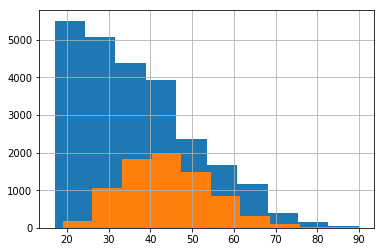

In [7]:
%matplotlib inline
data.groupby("income").age.hist()

# Splitting into training and test data

In [8]:
X = data.drop("income", axis=1) #Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’)
y = data.income

In [9]:
type(X)

pandas.core.frame.DataFrame

In [10]:
X.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [11]:
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: income, dtype: object

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y) #default is 25-75 split

In [13]:
type(X_train)

pandas.core.frame.DataFrame

In [14]:
X_train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
861,43,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,Mexico
13955,48,Federal-gov,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States
1985,29,Private,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,48,United-States
7921,29,Private,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,Columbia
25959,56,Private,7th-8th,4,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States


In [15]:
X_train.shape

(24420, 13)

# Exercises

Load the "boston house prices" dataset from the ``boston_house_prices.csv`` file using the ``pd.read_csv`` function (you don't need ``index_column`` here).
You can find a description of this dataset in the ``boston_house_prices.txt`` file.

This is a regression dataset with "MEDV" the median house value in a block in thousand dollars the target.
How many features are there and how many samples?

Split the data into a training and a test set for learning.
Optionally you can plot MEDV vs any of the features using the ``plot`` method of the dataframe (using ``kind="scatter"``).

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [17]:
data = pd.read_csv("boston_house_prices.csv")

In [18]:
print("Number of samples: {:d}  number of features: {:d}".format(data.shape[0], data.shape[1]))

Number of samples: 506  number of features: 14


In [19]:
print("Columns:")
print(data.columns)

Columns:
Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT', u'MEDV'],
      dtype='object')


In [20]:
X = data.drop("MEDV", axis=1)
y = data.MEDV

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)

(379, 13)


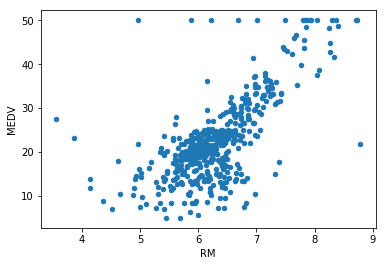

In [22]:
# plotting average room number RM vs MEDV
data.plot("RM", "MEDV", kind="scatter")

## Data Loading from Scikit-learn

In [23]:
from sklearn.datasets import load_digits
import numpy as np
digits = load_digits()
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [24]:
digits.data.shape

(1797, 64)

In [25]:
digits.target.shape

(1797,)

In [26]:
digits.target[3:9]

array([3, 4, 5, 6, 7, 8])

In [27]:
np.bincount(digits.target)

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180])

In [28]:
unique_elements, counts_elements = np.unique(digits.target, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[  0   1   2   3   4   5   6   7   8   9]
 [178 182 177 183 181 182 181 179 174 180]]


In [29]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [30]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

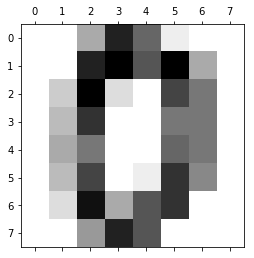

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook <- interactive interface

plt.matshow(digits.data[0].reshape(8, 8), cmap="gray_r")

In [38]:
digits.target[0]

0

[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27b31810>


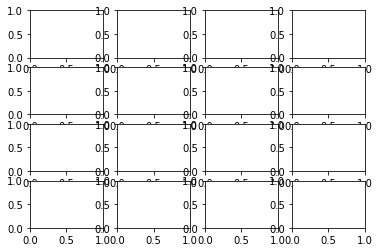

In [103]:
fig, axes = plt.subplots(4, 4)
print(axes)

In [105]:
print(axes.ravel())

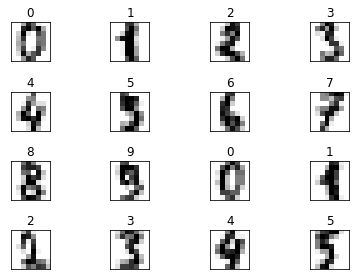

In [107]:
fig, axes = plt.subplots(4, 4)
for x, y, ax in zip(digits.data, digits.target, axes.ravel()):
    ax.set_title(y)
    ax.imshow(x.reshape(8, 8), cmap="gray_r")
    ax.set_xticks(())
    ax.set_yticks(())
plt.tight_layout()

In [91]:
type(digits.data)

numpy.ndarray

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target, test_size=0.25, random_state=1)

In [93]:
digits.data.shape

(1797, 64)

In [94]:
X_train.shape

(1347, 64)

In [95]:
X_test.shape

(450, 64)

In [97]:
X_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [98]:
X_train[1:5]

array([[ 0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 14.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 15.,  6.,  0.,
         0.,  0.,  0., 12., 16., 12., 15.,  6.,  0.,  0.,  0.,  7., 16.,
        10., 13., 14.,  0.,  0.,  0.,  0.,  9., 13., 11.,  6.,  0.],
       [ 0.,  0.,  0.,  5., 13.,  1.,  0.,  0.,  0.,  0.,  1., 15., 12.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
        11., 14.,  3.,  0.,  0.,  0.,  0.,  0., 11., 16., 16.,  4.,  0.,
         0.,  0.,  0., 11., 11.,  5., 13.,  0.,  0.,  0.,  0.,  6., 13.,
         7., 15.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  9.,  0.,  0.],
       [ 0.,  0.,  1., 11., 16., 16.,  7.,  0.,  0.,  0.,  7., 13.,  8.,
        16.,  5.,  0.,  0.,  0.,  0.,  1.,  1., 16.,  4.,  0.,  0.,  0.,
         2.,  7., 13., 16., 15.,  0.,  0.,  1., 15., 16., 16., 12.,  3.,
         0.,  0.,  1.,  8.,  4., 16.,  2.,  0.,  0.,  0.,  

# Exercises

Load the iris dataset from the ``sklearn.datasets`` module using the ``load_iris`` function.
The function returns a dictionary-like object that has the same attributes as ``digits``.

What is the number of classes, features and data points in this dataset?
Use a scatterplot to visualize the dataset.

You can look at ``DESCR`` attribute to learn more about the dataset.


In [46]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [47]:
iris = load_iris()
X, y = iris.data, iris.target

In [48]:
print("Dataset size: %d  number of features: %d  number of classes: %d"
      % (X.shape[0], X.shape[1], len(np.unique(y))))

Dataset size: 150  number of features: 4  number of classes: 3


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

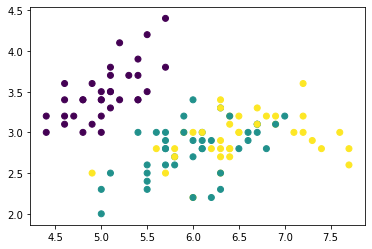

In [55]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [51]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

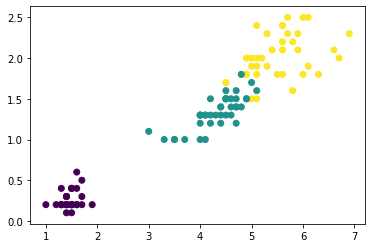

In [52]:
plt.scatter(X_train[:, 2], X_train[:, 3], c=y_train)